## Trajectory equations:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from sympy import *
init_printing()

Ex, Ey, Ez = symbols("E_x, E_y, E_z")
x, y, z = symbols("x, y, z")
vx, vy, vz, v = symbols("v_x, v_y, v_z, v")
t = symbols("t")
q, m = symbols("q, m")
c, eps0 = symbols("c, epsilon_0")

The equation of motion:
$$
\begin{gather*}
  m \frac{d^2 \vec{r} }{dt^2} = 
  q \vec{E} + \frac{q}{c} [ \vec{v} \vec{B} ] 
\end{gather*}
$$

In abscence of magnetic field in Cortesian coordinates :

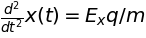

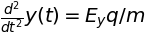

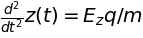

In [6]:
eq_x = Eq( diff(x(t), t, 2), q / m * Ex )
eq_y = Eq( diff(y(t), t, 2), q / m * Ey )
eq_z = Eq( diff(z(t), t, 2), q / m * Ez )
display( eq_x, eq_y, eq_z )

Assuming $E_z = 0$ and $E_y = 0$: 

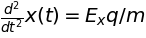

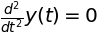

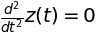

In [7]:
zero_EyEz_subs = [ (Ey, 0), (Ez, 0) ]
eq_x = eq_x.subs(zero_EyEz_subs)
eq_y = eq_y.subs(zero_EyEz_subs)
eq_z = eq_z.subs(zero_EyEz_subs)
display( eq_x, eq_y, eq_z )

Motion is uniform along the $z$-axis:

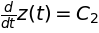

In [8]:
z_eq = dsolve( eq_z, z(t) )
vz_eq = Eq( z_eq.lhs.diff(t), z_eq.rhs.diff(t) )
display( z_eq, vz_eq )

The constants of integration can be found from the initial conditions $z(0) = 0$ and $v_z(0) = v$:

In [9]:
z_0 = 0
v_0 = v
c1_c2_system = []
initial_cond_subs = [(t, 0), (z(0), z_0), (diff(z(t),t).subs(t,0), v_0) ]
c1_c2_system.append( z_eq.subs( initial_cond_subs ) )
c1_c2_system.append( vz_eq.subs( initial_cond_subs ) )

c1, c2 = symbols("C1, C2")
c1_c2 = solve( c1_c2_system, [c1, c2] )
c1_c2

So that

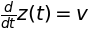

In [10]:
z_sol = z_eq.subs( c1_c2 )
vz_sol = vz_eq.subs( c1_c2 )
display( z_sol, vz_sol )

To solve an equation for $x(t)$, it is necessary to determine $E_x$ and substitute it into the equation.

From the Gauss theorem:
$$
\oint \vec{E} dv = 4 \pi \int \rho(x,y,z) dv 
$$

$$
E_x(x) dy dz = 4 \pi dy dz \int_0^x \rho(x) dx
$$

Suppose that $\rho(x) = const = \rho$. Then:

$$
E_x(x) = \begin{cases} 
  4 \pi \rho x, x < x_0 \mbox{ - inside the beam} \\
  4 \pi \rho x_0, x \ge x_0 \mbox{ - outside the beam}
  \end{cases}
$$


Using 

$$ j = \rho v $$ 

and

$$ 
I = j \cdot \mbox{width} \cdot \mbox{height} = I_0 \cdot \mbox{height} 
\\
\mbox{width} = 2 x_0 \quad \quad \mbox{height} = 2 y_0
$$

where $I_0$ is linear current density along the y-axis, 
it is possible to rewrite the $E_x$ using the linear current density instead of charge density:

$$E_x = \dfrac{ 2 \pi I_0 }{v}$$.

Substituting it into the equation for $x''$ results in the following equation:

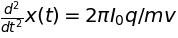

In [12]:
I0 = symbols('I_0')
Ex_subs = [ (Ex, 2 * pi * I0 / v) ]
eq_x = eq_x.subs( Ex_subs )
eq_x

It's solution is given by:

In [18]:
x_eqn_sol = dsolve( eq_x )
x_eqn_sol

From initial conditions $x(0) = x_0, v_0 = 0$:

In [19]:
x_0 = symbols( 'x_0' )
v_0 = 0
c1_c2_system = []
initial_cond_subs = [(t, 0), (x(0), x_0), (diff(x(t),t).subs(t,0), v_0) ]
c1_c2_system.append( x_eqn_sol.subs( initial_cond_subs ) )

x_eqn_sol_diff = Eq( x_eqn_sol.lhs.diff(t), x_eqn_sol.rhs.diff(t) )
c1_c2_system.append( x_eqn_sol_diff.subs( initial_cond_subs ) )

c1, c2 = symbols("C1, C2")
c1_c2 = solve( c1_c2_system, [c1, c2] )
c1_c2

So that

In [20]:
x_sol = x_eqn_sol.subs( c1_c2 )
x_sol

From the laws of motion for $x(t)$ and $z(t)$

In [21]:
display( x_sol, z_sol )

it is possible to obtain a trajectory equation:

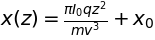

In [23]:
t_from_z = solve( z_sol.subs(z(t),z), t )[0]
x_z_traj = Eq( x_sol.lhs.subs( t, z ), x_sol.rhs.subs( [(t, t_from_z)] ) )
display( x_z_traj )